# IN THIS NOTEBOOK, THERE ARE SOME EARLY EXERCISES AT THE TOP, THEN THE IRIS, TITANIC, AND TELCO EXERCISES ARE SPLIT RESPECTIVELY

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns
import env
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy
import acquire
import prepare
#from pydataset: data('')
#from seaborn: sns.load_dataset('')

### 4. In a jupyter notebook, `classification_exercises.ipynb`, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, `df_iris`, from this data.

    - print the first 3 rows

In [2]:
df_iris = sns.load_dataset('iris')
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


    - print the number of rows and columns (shape)

In [3]:
df_iris.shape

(150, 5)

    - print the column names

In [4]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

    - print the data type of each column

In [5]:
df_iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

    - print the summary statistics for each of the numeric variables. Would you
      recommend rescaling the data based on these statistics?

In [7]:
stats = df_iris.describe().T
stats
# no need to rescale, all scales the same. Ravinder says we will address in detail later

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [8]:
stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,3.6
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,2.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,5.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,2.4


### 5. Read the `Table1_CustDetails` table from the `Excel_Exercises.xlsx` file into a dataframe named `df_excel`.

In [9]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name="Table1_CustDetails")
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,NaN,NaN


    - assign the first 100 rows to a new dataframe, `df_excel_sample`

In [10]:
df_excel_sample = pd.read_excel('Excel_Exercises.xlsx', nrows= 100)
df_excel_sample



,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,NaN,NaN
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No,NaN,NaN
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No,NaN,NaN
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No,NaN,NaN
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No,NaN,NaN
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No,NaN,NaN


    - print the number of rows of your original dataframe

In [11]:
df_excel.shape[0]

7049

    - print the first 5 column names

In [12]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

    - print the column names that have a data type of `object`

In [13]:
df_excel.select_dtypes('object')

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes
...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,Mailed check,No
7045,9992-RRAMN,Male,Yes,No,Electronic check,Yes
7046,9992-UJOEL,Male,No,No,Mailed check,No
7047,9993-LHIEB,Male,Yes,Yes,Mailed check,No


In [14]:
df_excel.select_dtypes('object').columns.tolist()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [15]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
Unnamed: 12          float64
Unnamed: 13          float64
dtype: object


    - compute the range for each of the numeric variables.

In [16]:
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,Unnamed: 12,Unnamed: 13
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000,0.0,0.0
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883,NaN,NaN
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,NaN,NaN
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500,NaN,NaN
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000,NaN,NaN
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000,NaN,NaN
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,NaN,NaN


In [17]:
monthly_charges_range = df_excel.monthly_charges.max() - df_excel.monthly_charges.min()
monthly_charges_range

100.5

In [18]:
total_charges_range = df_excel.total_charges.max() - df_excel.total_charges.min()
total_charges_range

8666.0

In [19]:
telco_stats = df_excel.describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80
Unnamed: 12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00,1.0
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00,2.0
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00,2.0
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00,2.0
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0
Unnamed: 12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 6. Read the data from [this google sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing) into a dataframe, `df_google`

    

In [21]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'   

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&gid=341089357'

In [22]:
df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


    - print the first 3 rows
    

In [23]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


    - print the number of rows and columns
    

In [24]:
df_google.shape

(891, 12)

    - print the column names
    

In [25]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

    - print the data type of each column
    

In [26]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

    - print the summary statistics for each of the numeric variables
    

In [27]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


    - print the unique values for each of your categorical variables

In [28]:
# for col in df_google:
#     print(df_google[col].unique())

In [29]:
# df_google.nunique(axis = 0)

In [30]:
pd.CategoricalIndex(df_google.Name), pd.CategoricalIndex(df_google.Survived), pd.CategoricalIndex(df_google.Pclass), pd.CategoricalIndex(df_google.Sex), pd.CategoricalIndex(df_google.Embarked)

(CategoricalIndex(['Braund, Mr. Owen Harris',
                   'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
                   'Heikkinen, Miss. Laina',
                   'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
                   'Allen, Mr. William Henry', 'Moran, Mr. James',
                   'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
                   'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
                   'Nasser, Mrs. Nicholas (Adele Achem)',
                   ...
                   'Markun, Mr. Johann', 'Dahlberg, Miss. Gerda Ulrika',
                   'Banfield, Mr. Frederick James', 'Sutehall, Mr. Henry Jr',
                   'Rice, Mrs. William (Margaret Norton)',
                   'Montvila, Rev. Juozas', 'Graham, Miss. Margaret Edith',
                   'Johnston, Miss. Catherine Helen "Carrie"',
                   'Behr, Mr. Karl Howell', 'Dooley, Mr. Patrick'],
                  categories=['Abbing, Mr. Anthony'

In [31]:
# df_google.sample(20)

In [32]:
# pd.CategoricalIndex(df_google.Sex, )

In [33]:
category_list = list(df_google.select_dtypes(include = 'object').columns)#.append('Pclass')
category_list.append('Pclass')
category_list

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']

In [34]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

# Using the Iris Data:

### Use the function defined in acquire.py to load the iris data.

In [35]:
import acquire

In [36]:
raw_iris_df = acquire.get_iris_data()
raw_iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [37]:
raw_iris_df.shape

(150, 6)

In [38]:
raw_iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [39]:
raw_iris_df.describe()

,species_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,6.400000,3.300000,5.100000,1.800000
max,3.000000,7.900000,4.400000,6.900000,2.500000


In [40]:
num_cols = raw_iris_df.columns[[raw_iris_df[col].dtype == 'float64' for col in raw_iris_df.columns]]
num_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

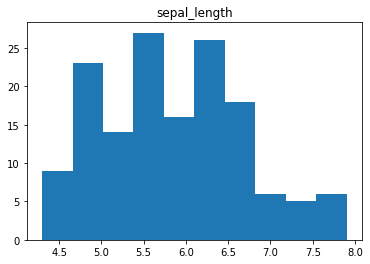

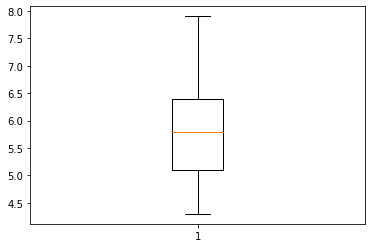

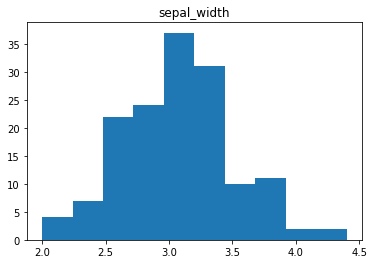

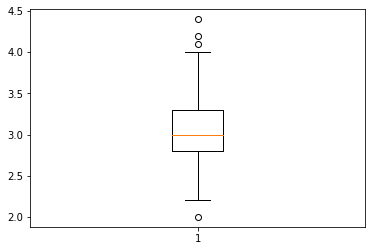

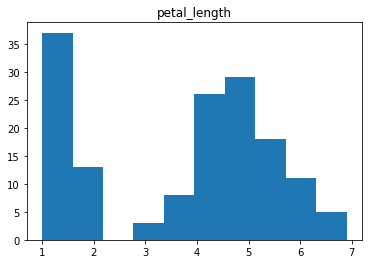

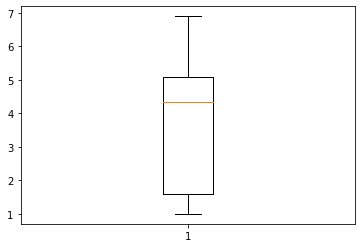

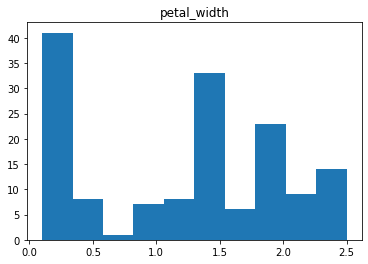

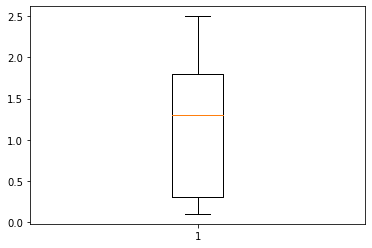

In [41]:
for col in num_cols:
    plt.hist(raw_iris_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(raw_iris_df[col])
    plt.show()

In [42]:
obj_cols = raw_iris_df.columns[[raw_iris_df[col].dtype == 'O' for col in raw_iris_df.columns]]
obj_cols

Index(['species_name'], dtype='object')

In [43]:
for col in obj_cols:
    print(raw_iris_df[col].value_counts())
    print(raw_iris_df[col].value_counts(normalize = True, dropna=False))
    print('------------------------')
        

versicolor    50
virginica     50
setosa        50
Name: species_name, dtype: int64
versicolor    0.333333
virginica     0.333333
setosa        0.333333
Name: species_name, dtype: float64
------------------------


In [44]:
raw_iris_df.sample()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
124,3,virginica,6.7,3.3,5.7,2.1


### Drop the species_id and measurement_id columns.

In [45]:
cols_to_drop = ['species_id']
raw_iris_df = raw_iris_df.drop(columns = cols_to_drop)
raw_iris_df.shape

(150, 5)

### Rename the species_name column to just species.

In [46]:
raw_iris_df.rename(columns={'species_name': 'species'}, inplace=True)
raw_iris_df.iloc[105]

species         virginica
sepal_length          7.6
sepal_width           3.0
petal_length          6.6
petal_width           2.1
Name: 105, dtype: object

### Create dummy variables of the species name and concatenate onto the iris dataframe.

In [47]:
dummy_df = pd.get_dummies(raw_iris_df[['species']], dummy_na=False, drop_first=[True,True])
dummy_df.sample()

,species_versicolor,species_virginica
17,0,0


In [48]:
raw_iris_df = pd.concat([raw_iris_df, dummy_df], axis = 1)
raw_iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [49]:
raw_iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [50]:
raw_iris_df = acquire.get_iris_data()

In [51]:
def prep_iris(df):
    '''
    tranforms iris data set by dropping, renaming, adding columns
    '''
#     iris_df = acquire.get_iris_data()
    cols_to_drop = ['species_id']
    df = df.drop(columns = cols_to_drop)
    df.rename(columns={'species_name': 'species'}, inplace=True)
    dummy_df = pd.get_dummies(
    df[['species']], dummy_na=False, drop_first=[True,True])
    df = pd.concat([df, dummy_df], axis = 1)

    return df



In [52]:
iris_df = prep_iris(raw_iris_df)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


# 1. Acquire, prepare & split your data. (exploratory analysis lesson)

In [53]:
iris_df = prep_iris(raw_iris_df)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [54]:
def split_data(iris_df):
    '''
    Takes in iris DF and returns train, validate, test sbusert dataframes
    '''
    iris_train, iris_test = train_test_split(iris_df, test_size = .2, stratify=iris_df.species)
    iris_train, iris_validate = train_test_split(iris_train, test_size=.3, stratify=iris_train.species)
    return iris_train, iris_validate, iris_test

In [55]:
iris_train, iris_validate, iris_test = split_data(iris_df)
print(f'iris_train: {iris_train.shape}')
print(f'iris_validate: {iris_validate.shape}')
print(f'iris_test: {iris_test.shape}')

# as you can see, we now have split the data into 3 sets

iris_train: (84, 7)
iris_validate: (36, 7)
iris_test: (30, 7)


# Univariate Stats
### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [56]:
iris_train.sample()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
78,versicolor,6.0,2.9,4.5,1.5,1,0


In [57]:
iris_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 53 to 128
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             84 non-null     object 
 1   sepal_length        84 non-null     float64
 2   sepal_width         84 non-null     float64
 3   petal_length        84 non-null     float64
 4   petal_width         84 non-null     float64
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


In [58]:
iris_train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.880952,3.064286,3.779762,1.198810,0.333333,0.333333
std,0.839316,0.466632,1.790792,0.733451,0.474236,0.474236
min,4.300000,2.200000,1.100000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.575000,0.400000,0.000000,0.000000
50%,5.800000,3.000000,4.400000,1.400000,0.000000,0.000000
75%,6.425000,3.400000,5.150000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.700000,2.500000,1.000000,1.000000


In [59]:
num_cols = iris_train.columns[[iris_train[col].dtype == 'float64' for col in iris_df.columns]]
num_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

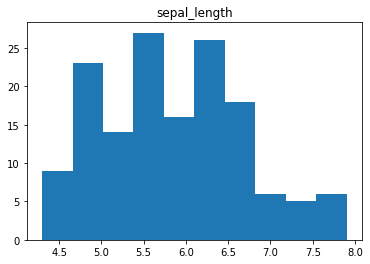

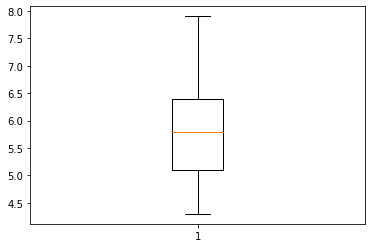

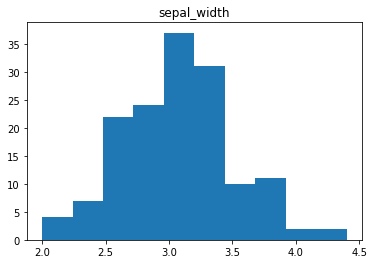

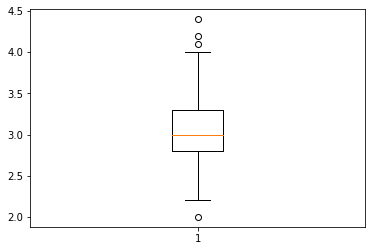

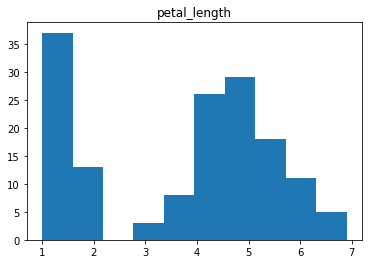

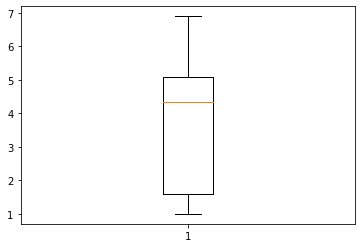

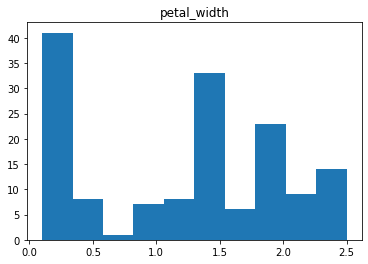

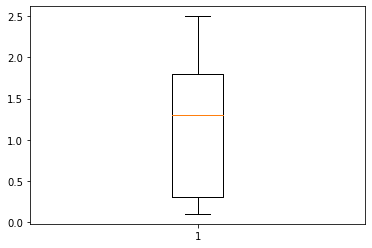

In [60]:
for col in num_cols:
    plt.hist(iris_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(iris_df[col])
    plt.show()

### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [61]:
iris_train.species.value_counts()

virginica     28
versicolor    28
setosa        28
Name: species, dtype: int64

In [62]:
virginica = iris_train[iris_train.species == 'virginica']
setosa = iris_train[iris_train.species == 'setosa']
versicolor = iris_train[iris_train.species == 'versicolor']

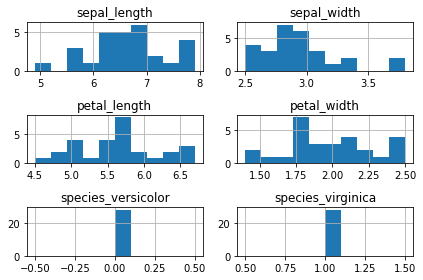

In [63]:
virginica.hist()
plt.tight_layout()
# takeaways:
# for viriginica, sepal length and width are relatively normal
# petal lenght and width aren't so normal

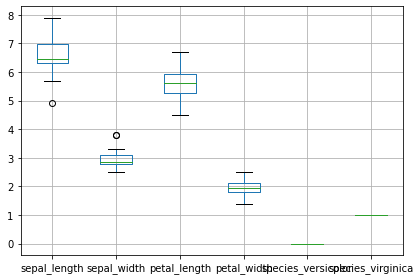

In [64]:
virginica.boxplot()
plt.tight_layout()
# note how the different measureable values are all over. relation btwn sepal lenght and width? petal?

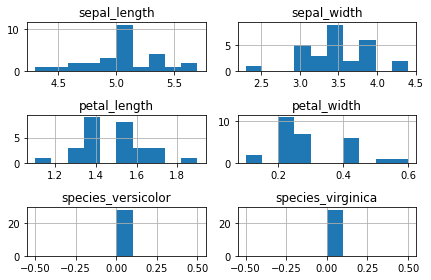

In [65]:
setosa.hist()
plt.tight_layout()
# setosa takeways...petal widths are kind of discrete seeming. 
# all categories are sort of less normal distributed

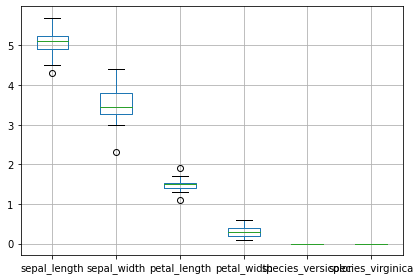

In [66]:
setosa.boxplot()
plt.tight_layout()
# all going down...no relation btwn each other, but maybe an identifying point related to virginica?

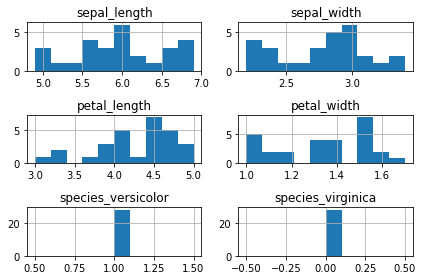

In [67]:
versicolor.hist()
plt.tight_layout()
#versicolor takeaways: similar as with setosa

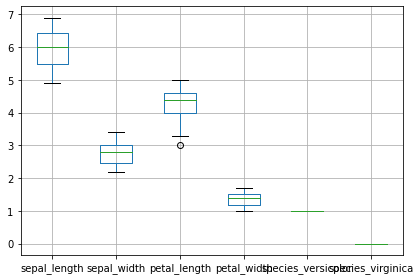

In [68]:
versicolor.boxplot()
plt.tight_layout()
# similar to what we saw on virginica

### Document takeaways & any actions

- see above

# Bivariate Stats

### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).


### For each measurement type, compute the descriptive statistics for each species

In [69]:
iris_train.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
53,versicolor,5.5,2.3,4.0,1.3,1,0


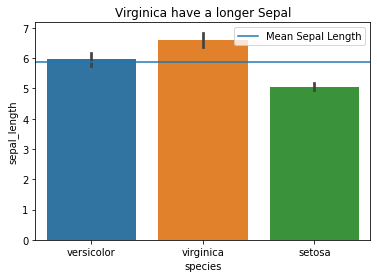

In [70]:
plt.title("Virginica have a longer Sepal")
sns.barplot(x="species", y="sepal_length", data=iris_train)
mean_sepal_length = iris_train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean Sepal Length")
plt.legend()
plt.show()

In [71]:
iris_train.sepal_length.describe()

count    84.000000
mean      5.880952
std       0.839316
min       4.300000
25%       5.100000
50%       5.800000
75%       6.425000
max       7.900000
Name: sepal_length, dtype: float64

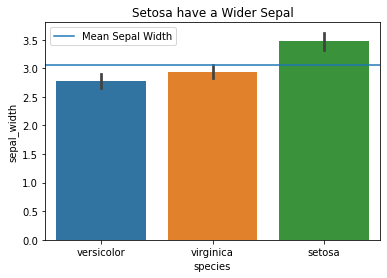

In [72]:
plt.title("Setosa have a Wider Sepal")
sns.barplot(x="species", y="sepal_width", data=iris_train)
mean_sepal_width = iris_train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean Sepal Width")
plt.legend()
plt.show()

In [73]:
iris_train.sepal_width.describe()

count    84.000000
mean      3.064286
std       0.466632
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

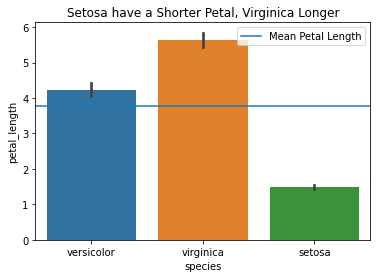

In [74]:
plt.title("Setosa have a Shorter Petal, Virginica Longer")
sns.barplot(x="species", y="petal_length", data=iris_train)
mean_petal_length = iris_train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean Petal Length")
plt.legend()
plt.show()

In [75]:
iris_train.petal_length.describe()

count    84.000000
mean      3.779762
std       1.790792
min       1.100000
25%       1.575000
50%       4.400000
75%       5.150000
max       6.700000
Name: petal_length, dtype: float64

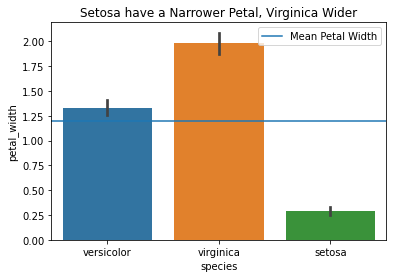

In [76]:
plt.title("Setosa have a Narrower Petal, Virginica Wider")
sns.barplot(x="species", y="petal_width", data=iris_train)
mean_petal_width = iris_train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean Petal Width")
plt.legend()
plt.show()

In [77]:
iris_train.petal_width.describe()

count    84.000000
mean      1.198810
std       0.733451
min       0.100000
25%       0.400000
50%       1.400000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. 

### Do the same for the other measurement types

In [78]:
import scipy
iris_train.sample()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
128,virginica,6.4,2.8,5.6,2.1,0,1


In [79]:
versicolor = iris_train[iris_train.species_versicolor == 1]
virginica = iris_train[iris_train.species_virginica == 1]
setosa = iris_train[(iris_train.species_versicolor == 0) & (iris_train.species_virginica == 0)]

In [80]:
versicolor.petal_width.var(), virginica.petal_width.var()

(0.04522486772486771, 0.081005291005291)

In [81]:

null_hypothesis = "versicolor petal width is greater than or equal to that of virginica"
alternative_hypothesis = "versicolor petal width is less than that of virginica"



In [82]:
alpha = .05
t, p = scipy.stats.mannwhitneyu(versicolor.petal_width, virginica.petal_width)
t, p

(22.5, 6.270843545094879e-10)

In [83]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that versicolor petal width is greater than or equal to that of virginica
We find evidence evidence to move forward with the understaind that versicolor petal width is less than that of virginica


In [84]:
versicolor.petal_length.var(), virginica.petal_length.var()

(0.2517460317460318, 0.3230026455026455)

In [85]:
null_hypothesis = "versicolor petal length is greater than or equal to that of virginica"
alternative_hypothesis = "versicolor petal length is less than that of virginica"

In [86]:
alpha = .05
t, p = scipy.stats.mannwhitneyu(versicolor.petal_length, virginica.petal_length)
t, p

(15.0, 3.2309362735794294e-10)

In [87]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that versicolor petal length is greater than or equal to that of virginica
We find evidence evidence to move forward with the understaind that versicolor petal length is less than that of virginica


In [88]:
versicolor.sepal_width.var(), virginica.sepal_width.var()

(0.10915343915343917, 0.1076587301587301)

In [89]:
null_hypothesis = "versicolor sepal width is greater than or equal to that of virginica"
alternative_hypothesis = "versicolor sepal width is less than that of virginica"

In [90]:
alpha = .05
t, p = scipy.stats.mannwhitneyu(versicolor.sepal_width, virginica.sepal_width)
t, p

(308.5, 0.08534728045878354)

In [91]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We fail to reject the null hypothesis
There is no evidence that versicolor sepal width is greater than or equal to that of virginica


In [92]:
versicolor.sepal_length.var(), virginica.sepal_length.var()

(0.3253439153439153, 0.47089947089947093)

In [93]:
null_hypothesis = "versicolor sepal lenght is greater than or equal to that of virginica"
alternative_hypothesis = "versicolor sepal length is less than that of virginica"

In [94]:
alpha = .05
t, p = scipy.stats.mannwhitneyu(versicolor.sepal_length, virginica.sepal_length)
t, p

(187.5, 0.00040469841056021565)

In [95]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that versicolor sepal lenght is greater than or equal to that of virginica
We find evidence evidence to move forward with the understaind that versicolor sepal length is less than that of virginica


# MULTIVARIATE STATS

### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

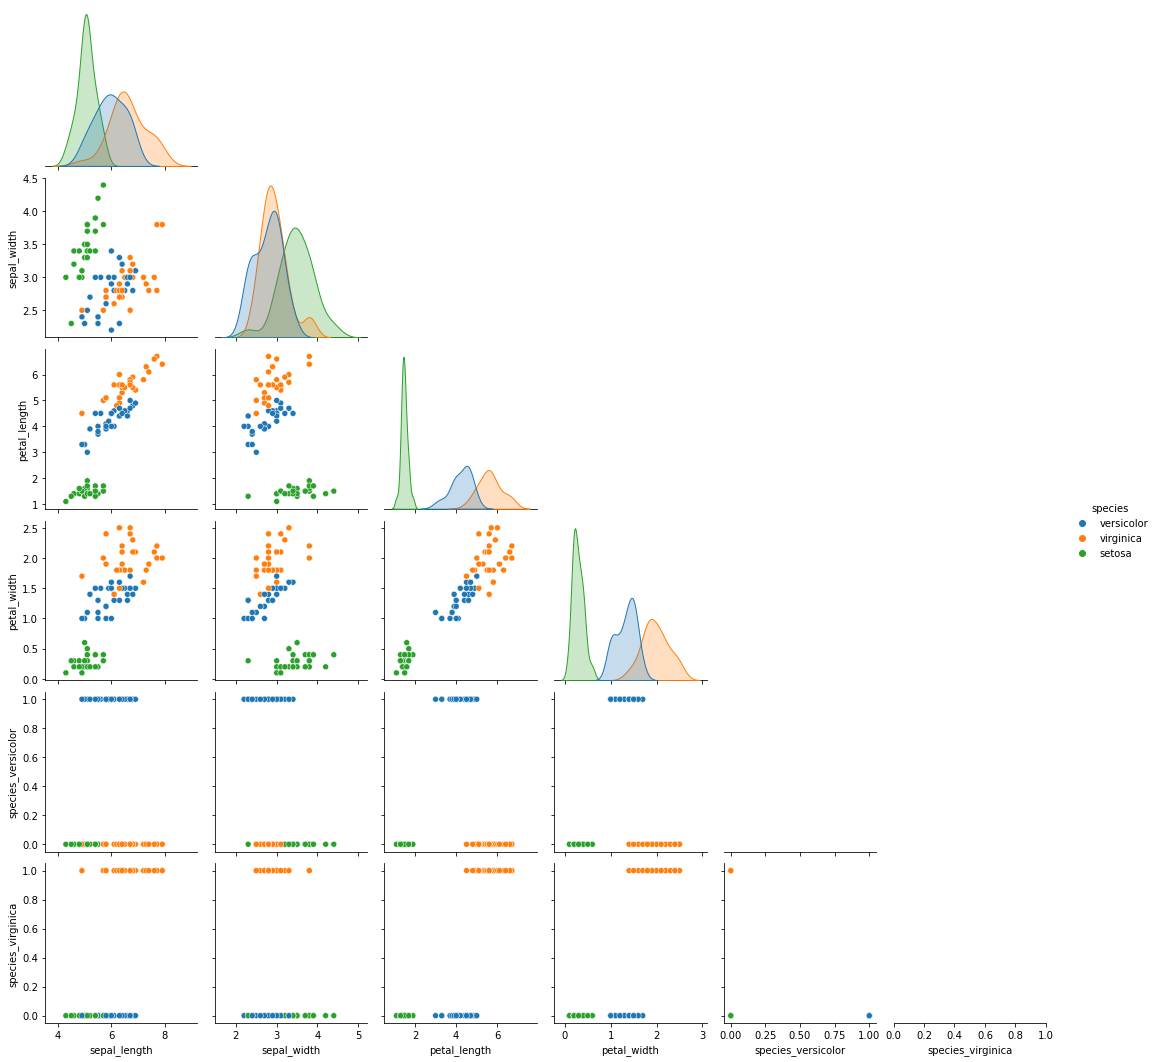

In [96]:
sns.pairplot(iris_train, hue = 'species', corner=True)

#check out that clear relationship between petal_width and petal_length for each species

In [97]:
iris_train.sample()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
49,setosa,5.0,3.3,1.4,0.2,0,0


### Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

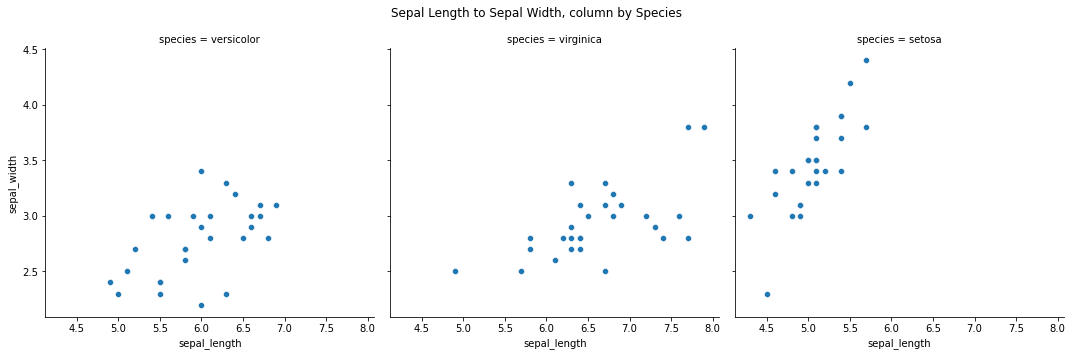

In [98]:
rel = sns.relplot(x='sepal_length', y='sepal_width', data=iris_train, col="species")
rel.fig.suptitle('Sepal Length to Sepal Width, column by Species') # One way to title a relplot
plt.tight_layout()

#notice how we assign the sns graphic to a variable, and use the variable to super title the many graphs

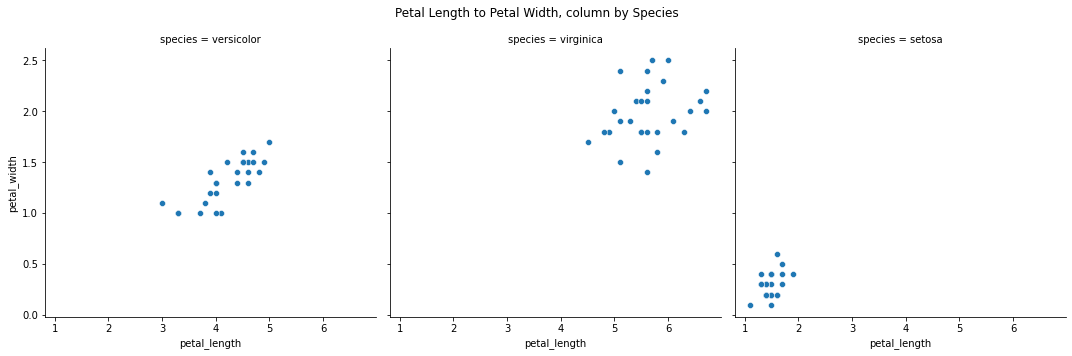

In [99]:
rel = sns.relplot(x='petal_length', y='petal_width', data=iris_train, col="species")
rel.fig.suptitle('Petal Length to Petal Width, column by Species') # One way to title a relplot
plt.tight_layout()

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [100]:
iris_train.sample()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
47,setosa,4.6,3.2,1.4,0.2,0,0


In [101]:
iris_melted = iris_train.drop(columns=['species_versicolor', 'species_virginica']).melt(id_vars='species')
iris_melted

,species,variable,value
0,versicolor,sepal_length,5.5
1,virginica,sepal_length,6.4
2,setosa,sepal_length,4.9
3,setosa,sepal_length,5.1
4,versicolor,sepal_length,6.3
...,...,...,...
331,virginica,petal_width,1.5
332,versicolor,petal_width,1.0
333,versicolor,petal_width,1.2
334,virginica,petal_width,2.4


<AxesSubplot:xlabel='variable', ylabel='value'>

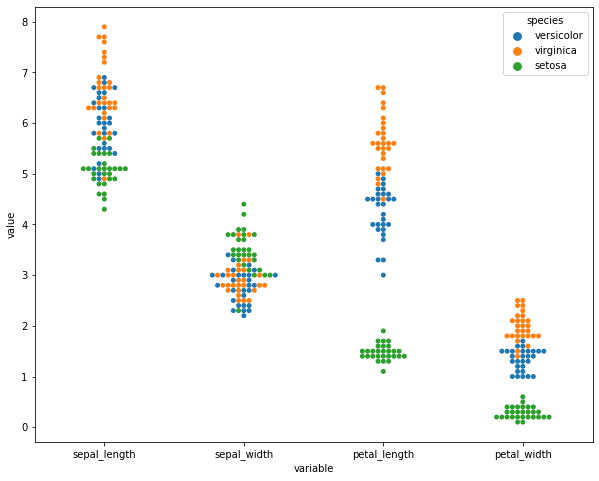

In [102]:
plt.figure(figsize = (10, 8))
sns.swarmplot(x='variable', y='value', data=iris_melted, hue = 'species')


In [103]:
# key takeaways: petal length as an identifier; also petal width. Sepal width not so helpful; sepal length
# could help id setosa but not so handy for the other two species

### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [104]:
iris_train.sample()


,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
40,setosa,5.0,3.5,1.3,0.3,0,0


In [105]:
iris_train['sepal_area'] = iris_train.sepal_length * iris_train.sepal_width
iris_train['petal_area'] = iris_train.petal_length * iris_train.petal_width


iris_train.sample()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica,sepal_area,petal_area
82,versicolor,5.8,2.7,3.9,1.2,1,0,15.66,4.68


<AxesSubplot:>

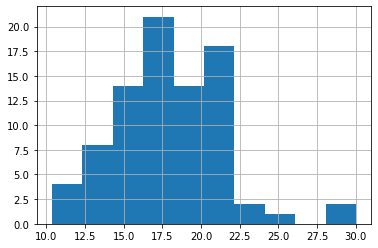

In [106]:
iris_train.sepal_area.hist() 


<AxesSubplot:>

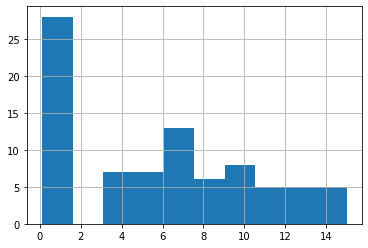

In [107]:
iris_train.petal_area.hist()

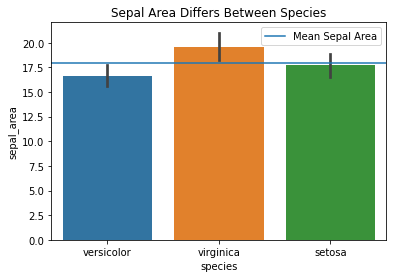

In [108]:
plt.title("Sepal Area Differs Between Species")
sns.barplot(x="species", y="sepal_area", data=iris_train)
mean_sepal_area = iris_train.sepal_area.mean()
plt.axhline(mean_sepal_area, label="Mean Sepal Area")
plt.legend()
plt.show()

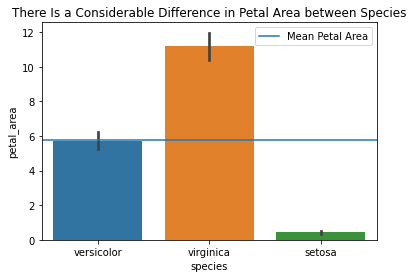

In [109]:
plt.title("There Is a Considerable Difference in Petal Area between Species")
sns.barplot(x="species", y="petal_area", data=iris_train)
mean_petal_area = iris_train.petal_area.mean()
plt.axhline(mean_petal_area, label="Mean Petal Area")
plt.legend()
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

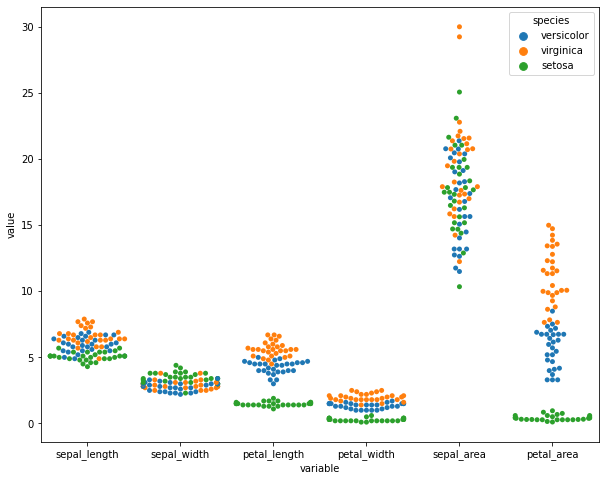

In [110]:
iris_melted = iris_train.drop(columns=['species_versicolor', 'species_virginica']).melt(id_vars='species')
plt.figure(figsize = (10, 8))
sns.swarmplot(x='variable', y='value', data=iris_melted, hue = 'species')

In [111]:
# sepal area is a terrible indicator of species, as seen above.  
# petal area, on the other hand, might be the best.  as good or better than petal length

In [112]:
virginica = iris_train[iris_train.species == 'virginica']
setosa = iris_train[iris_train.species == 'setosa']
versicolor = iris_train[iris_train.species == 'versicolor']

In [113]:
versicolor.petal_area.var(), virginica.petal_area.var(), setosa.petal_area.var()

(2.1287645502645507, 4.7018031746031745, 0.041648015873015864)

In [114]:
null_hypothesis = "virginica petal area is less than or equal to that of versicolor"
alternative_hypothesis = "virginica petal wirea adth is greater than that of versicolor"

alpha = .01
t, p = scipy.stats.mannwhitneyu(virginica.petal_area, versicolor.petal_area)

print(t,p)

if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

3.0 9.587299372818939e-11
We find evidence to reject the null hypothesis that virginica petal area is less than or equal to that of versicolor
We find evidence evidence to move forward with the understaind that virginica petal wirea adth is greater than that of versicolor


In [115]:
null_hypothesis = "versicolor petal area is less than or equal to that of setosa"
alternative_hypothesis = "versicolor petal area is greater than that of setosa"

alpha = .01
t, p = scipy.stats.mannwhitneyu(versicolor.petal_area, setosa.petal_area)

print(t,p)

if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

0.0 6.718369979292849e-11
We find evidence to reject the null hypothesis that versicolor petal area is less than or equal to that of setosa
We find evidence evidence to move forward with the understaind that versicolor petal area is greater than that of setosa


## my theory stated and tested above is that the each respective species has a greater petal area than the previous. alpha was set at .01

# Using the Titanic dataset

### Use the function defined in acquire.py to load the Titanic data.

In [116]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### Drop any unnecessary, unhelpful, or duplicated columns.

In [117]:
titanic_df = prepare.clean_data(titanic_df)

In [118]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1


### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [119]:
#whoops already did that in the step above

### Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [120]:
def prep_titanic(titanic_df):
    '''
    This function will clean the data etc etc...
    '''
    
    titanic_df = titanic_df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class']
    titanic_df = titanic_df.drop(columns = cols_to_drop)
    titanic_df['embark_town'] = titanic_df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na=False, drop_first=[True,True])
    titanic_df = pd.concat([titanic_df, dummy_df], axis = 1)
    return titanic_df

In [121]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [122]:
titanic_df = prep_titanic(titanic_df)
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1


In [123]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, titanic_test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    titanic_train, titanic_validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return titanic_train, titanic_validate, titanic_test

In [124]:
titanic_train, titanic_validate, titanic_test = train_validate_test_split(titanic_df, target='survived')
titanic_train.shape, titanic_validate.shape, titanic_test.shape

((498, 13), (214, 13), (179, 13))

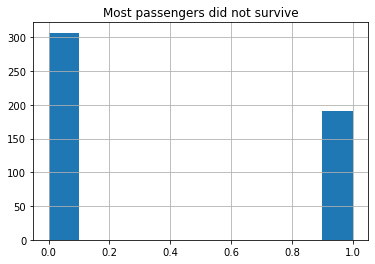

In [125]:
plt.title("Most passengers did not survive")
titanic_train.survived.hist()
plt.show()



In [126]:
# We can call .mean() since 0 and 1 are numeric
print("Percent survived from titanic_train")
round(titanic_train.survived.mean(), 3)

Percent survived from titanic_train


0.384

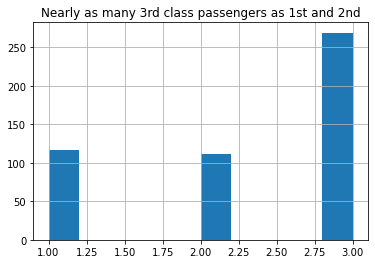

In [127]:
plt.title("Nearly as many 3rd class passengers as 1st and 2nd")
titanic_train.pclass.hist()
plt.show()

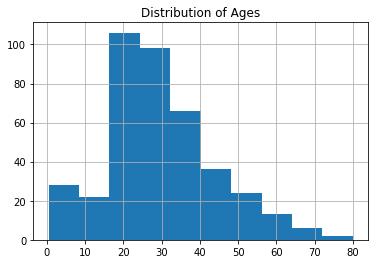

In [128]:
plt.title("Distribution of Ages")
titanic_train.age.hist()
plt.show()

In [129]:
titanic_train.sample()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
603,603,0,3,male,44.0,0,0,8.05,Southampton,1,1,0,1


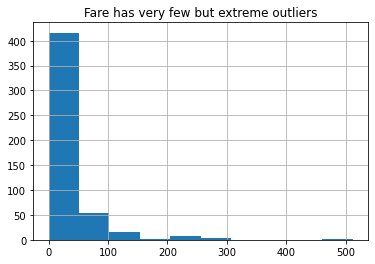

In [130]:
plt.title("Fare has very few but extreme outliers")
titanic_train.fare.hist()
plt.show()

In [131]:
## are we going to have to deal with those outlying fares?


# next, bivariate

## if you use y/n (1/0) for the y axis, you're basically giving yourself the percentage.  take note below

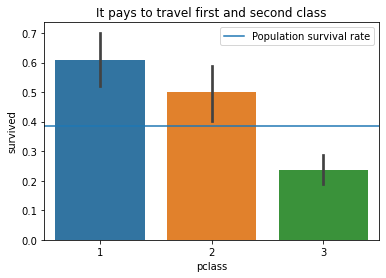

In [132]:
plt.title("It pays to travel first and second class")
sns.barplot(x="pclass", y="survived", data=titanic_train)
population_survival_rate = titanic_train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [133]:
### hypothesis test immediately following, for thoroughness's sake:
from scipy import stats

In [134]:
# The above visual is quite clear, but if it was less clear or we want more certainty, we'll run a hypothesis test
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "survival and class of ticket are independent"
alternative_hypothesis = "there is a relationship between class of ticket and survival"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(titanic_train.survived, titanic_train.pclass)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that survival and class of ticket are independent
Sufficient evidence to move forward understanding that there is a relationship between class of ticket and survival


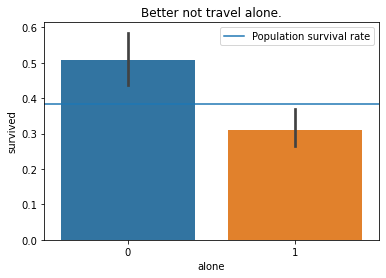

In [135]:
plt.title("Better not travel alone.")
sns.barplot(x="alone", y="survived", data=titanic_train)
population_survival_rate = titanic_train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [136]:
# If the visual was unclear or we need more confirmation, run a hypothesis test
# Let's run a chi squared to compare proportions
alpha = 0.05
null_hypothesis = "survival and traveling alone are independent"
alternative_hypothesis = "there is a relationship between survival and traveling alone"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(titanic_train.survived, titanic_train.alone)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that survival and traveling alone are independent
Sufficient evidence to move forward understanding that there is a relationship between survival and traveling alone


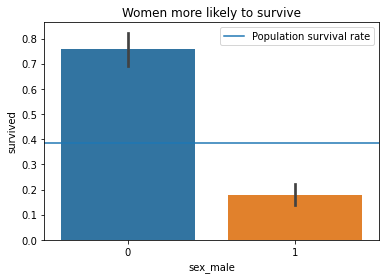

In [137]:
plt.title("Women more likely to survive")
sns.barplot(x='sex_male', y="survived", data=titanic_train)
population_survival_rate = titanic_train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [138]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05

null_hypothesis = "survival and gender are independent"
alternative_hypothesis = "there is a relationship between survival and gender"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(titanic_train.survived, titanic_train.sex_male)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that survival and gender are independent
Sufficient evidence to move forward understanding that there is a relationship between survival and gender


## numeric vs categorical

H
0
: Survived passenger fares cost less than or equal to non-surviving passenger fare

H
a
: Surviving passenger fares cost more than non-surviving passenger fares

In [139]:
not_survived = titanic_train[titanic_train.survived == 0]
survived = titanic_train[titanic_train.survived == 1]

In [140]:
not_survived.fare.var(), survived.fare.var()

(1147.9409071240707, 3687.77476607355)

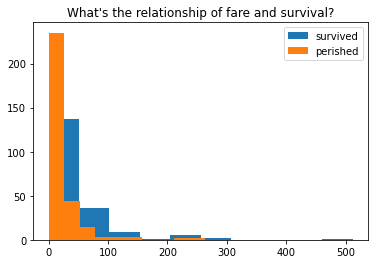

In [141]:
plt.title("What's the relationship of fare and survival?")
plt.hist(survived.fare, label="survived")
plt.hist(not_survived.fare, label="perished")
plt.legend()
plt.show()

#plain matplotlib
# the story is unclear from the visual, so a hypothesis test should be run

In [142]:
null_hypothesis = "fares paid by survived passengers are less than or equal to fares paid by non-surviving passengers"
alternative_hypothesis = "fares paid by surviving passengers are higher than non-surviving passengers"

# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(survived.fare, not_survived.fare, alternative="greater")
# alternative argument handles the directionality. b/c of this argument, we don't have to check if t is + or -

In [143]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that fares paid by survived passengers are less than or equal to fares paid by non-surviving passengers
We find evidence evidence to move forward with the understaind that fares paid by surviving passengers are higher than non-surviving passengers


# MULTIVARIATE analysis

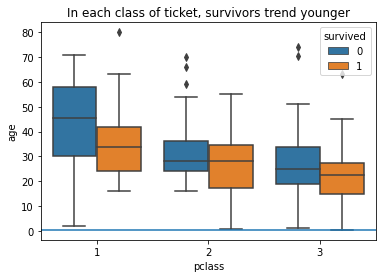

In [144]:
# At each class ticket, women have better survival rates
plt.title("In each class of ticket, survivors trend younger")
sns.boxplot(x="pclass", y="age", data=titanic_train, hue="survived")
population_survival_rate = titanic_train.survived.mean()
plt.axhline(population_survival_rate)
plt.show()

In [145]:
# are there enough 1st class passengers to draw conclusions?
titanic_train[titanic_train.pclass == 1].survived.value_counts()

1    71
0    46
Name: survived, dtype: int64

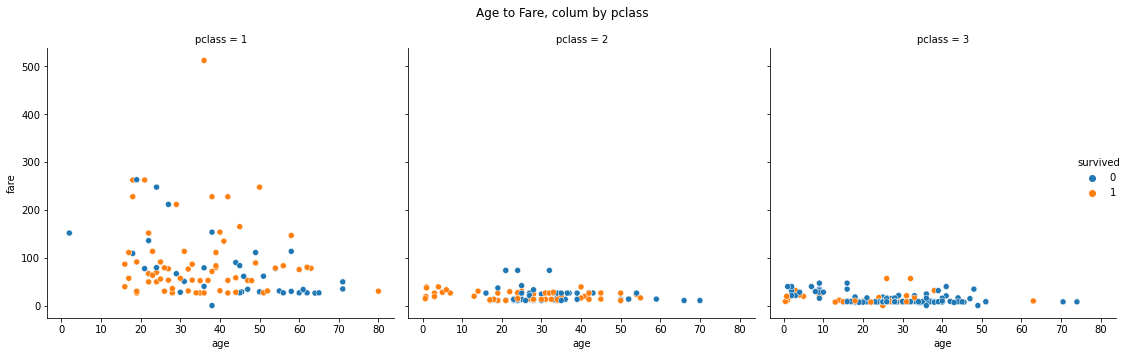

In [146]:
# No discernable relationship between age and fare, but the pclass relates to survival
rel = sns.relplot(x='age', y='fare', data=titanic_train, col="pclass", hue="survived")
rel.fig.suptitle('Age to Fare, colum by pclass') # One way to title a relplot
plt.tight_layout()

In [147]:
# fare and age don't seem to relate
# however, the more people paid, the more orange we see

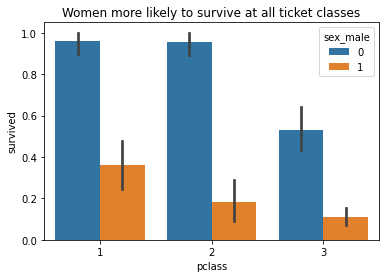

In [148]:
plt.title("Women more likely to survive at all ticket classes")
sns.barplot(x="pclass", y="survived", hue="sex_male", data=titanic_train)
population_survival_rate = titanic_train.survived.mean()
plt.show()

In [149]:
women_in_3rd_class = titanic_train[(titanic_train.pclass == 3) & (titanic_train.sex_male == 0)]
men_in_3rd_class = titanic_train[(titanic_train.pclass == 3) & (titanic_train.sex_male == 1)]

print(f"Overall survival rate:", round(titanic_train.survived.mean(), 2))
print(f"Overall female survival rate", round(titanic_train[titanic_train.sex_male == 0].survived.mean(), 2))
print(f"Overall male survival rate", round(titanic_train[titanic_train.sex_male == 1].survived.mean(), 2))
print(f"3rd class ticket survival rate", round(titanic_train[titanic_train.pclass == 3].survived.mean(), 2))
print(f"Survival rate for women in 3rd class:", round(women_in_3rd_class.survived.mean(), 2))
print(f"Survival rate for men in 3rd class:", round(men_in_3rd_class.survived.mean(), 2))

Overall survival rate: 0.38
Overall female survival rate 0.76
Overall male survival rate 0.18
3rd class ticket survival rate 0.24
Survival rate for women in 3rd class: 0.53
Survival rate for men in 3rd class: 0.11


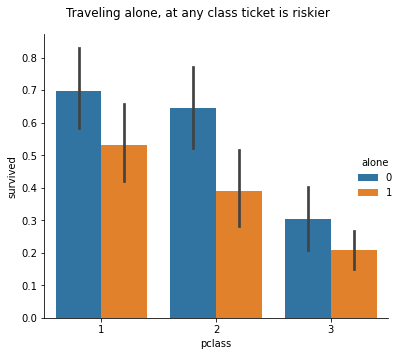

In [150]:
cat = sns.catplot(data=titanic_train, x="pclass", y="survived", hue="alone", kind="bar")
cat.fig.suptitle("Traveling alone, at any class ticket is riskier")
plt.tight_layout()

In [151]:
titanic_train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,36.0,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,9.0,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,7.0,4,1,39.6875,Southampton,0,1,0,1
259,259,1,2,female,50.0,0,1,26.0000,Southampton,0,0,0,1
306,306,1,1,female,NaN,0,0,110.8833,Cherbourg,1,0,0,0


# Using the Telco dataset

### Use the function defined in acquire.py to load the Telco data.

In [224]:
raw_telco_df = acquire.get_telco_data()
raw_telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [225]:
raw_telco_df.shape

(7043, 24)

In [226]:
raw_telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [227]:
raw_telco_df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [228]:
num_cols = raw_telco_df.columns[[raw_telco_df[col].dtype in ('int64', 'float64') for col in raw_telco_df.columns]]
num_cols

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges'],
      dtype='object')

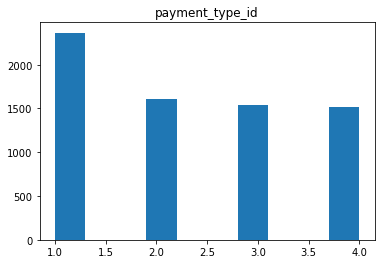

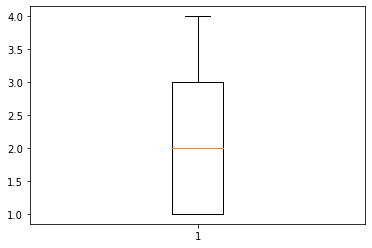

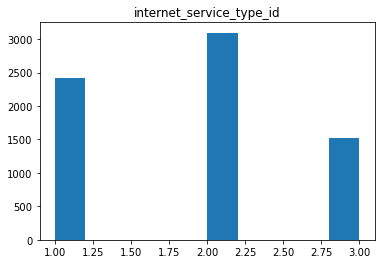

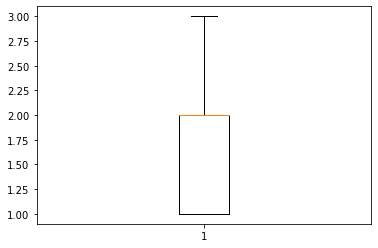

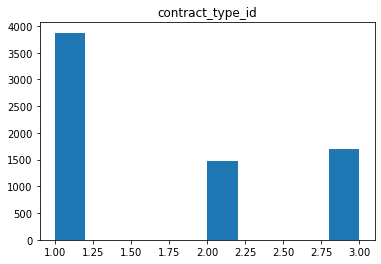

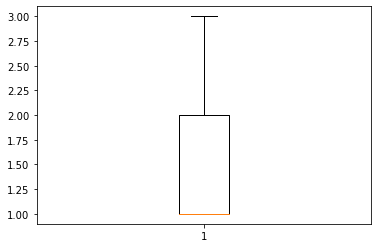

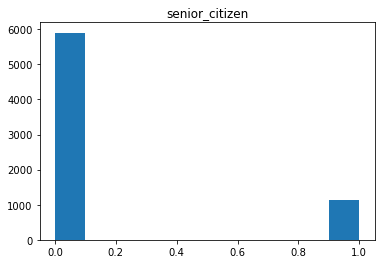

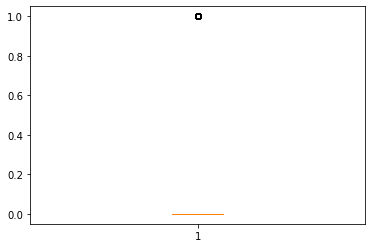

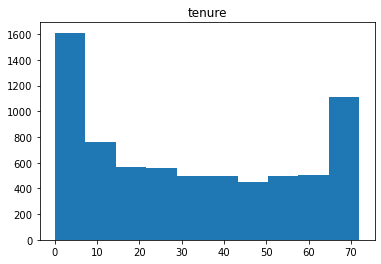

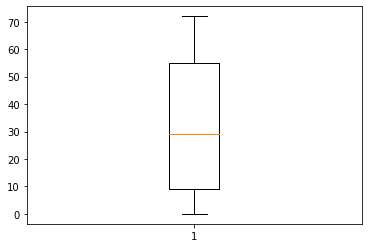

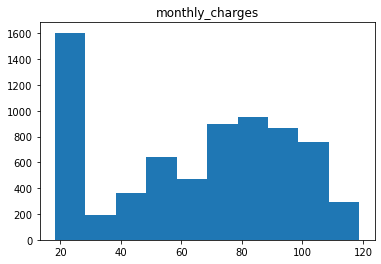

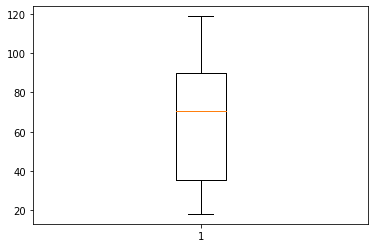

In [229]:
for col in num_cols:
    plt.hist(raw_telco_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(raw_telco_df[col])
    plt.show()

In [230]:
obj_cols = raw_telco_df.columns[[raw_telco_df[col].dtype == 'O' for col in raw_telco_df.columns]]
obj_cols

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'total_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

In [231]:
for col in obj_cols:
    print(raw_telco_df[col].value_counts())
    print(raw_telco_df[col].value_counts(normalize = True, dropna=False))
    print('------------------------')
        

4955-VCWBI    1
3372-CDXFJ    1
9298-WGMRW    1
2070-FNEXE    1
3221-CJMSG    1
             ..
2660-EMUBI    1
6349-JDHQP    1
0799-DDIHE    1
2465-BLLEU    1
5896-NPFWW    1
Name: customer_id, Length: 7043, dtype: int64
4955-VCWBI    0.000142
3372-CDXFJ    0.000142
9298-WGMRW    0.000142
2070-FNEXE    0.000142
3221-CJMSG    0.000142
                ...   
2660-EMUBI    0.000142
6349-JDHQP    0.000142
0799-DDIHE    0.000142
2465-BLLEU    0.000142
5896-NPFWW    0.000142
Name: customer_id, Length: 7043, dtype: float64
------------------------
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
------------------------
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
------------------------
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
------------------------
Yes    6361
No     

In [232]:
raw_telco_df.monthly_charges.value_counts(bins=5, sort=False)

(18.148999999999997, 38.35]    1797
(38.35, 58.45]                 1005
(58.45, 78.55]                 1367
(78.55, 98.65]                 1826
(98.65, 118.75]                1048
Name: monthly_charges, dtype: int64

In [233]:
missing = raw_telco_df.isnull().sum()
missing[missing > 0]
# no null values in the dataset.  

Series([], dtype: int64)

In [234]:
raw_telco_df.sample()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
5193,1,2,1,8433-WXGNA,Male,0,No,No,2,Yes,...,No,No,No,Yes,75.7,189.2,Yes,Month-to-month,Fiber optic,Electronic check


### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [235]:
# total charges is a string that needs to be converted to float
# 0   payment_type_id           7043 non-null   int64   DROP IT
# 1   internet_service_type_id  7043 non-null   int64   DROP IT
# 2   contract_type_id          7043 non-null   int64   DROP IT
# 3   customer_id               7043 non-null   object  
# 4   gender                    7043 non-null   object  NEED TO DUMMY
# 5   senior_citizen            7043 non-null   int64   NEED TO DUMMY
# 6   partner                   7043 non-null   object  DUMMY IT
# 7   dependents                7043 non-null   object  DUMMY IT
# 8   tenure                    7043 non-null   int64  
# 9   phone_service             7043 non-null   object  DUMMY.....YES/NO....'HAS_PHONE_SVC'
# 10  multiple_lines            7043 non-null   object  DUMMY IT--THIS HAS 3 POSSIBLE VALUES
# 11  online_security           7043 non-null   object  DITTO 
# 12  online_backup             7043 non-null   object  DITTO
# 13  device_protection         7043 non-null   object  DITTO
# 14  tech_support              7043 non-null   object  DITTO
# 15  streaming_tv              7043 non-null   object  DITTO
# 16  streaming_movies          7043 non-null   object  DITTO
# 17  paperless_billing         7043 non-null   object  YES/NO....DUMMY IT
# 18  monthly_charges           7043 non-null   float64
# 19  total_charges             7043 non-null   object  CONVERT TO FLOAT. ALSO...WE HAVE MISSING VALUES :(
# 20  churn                     7043 non-null   object  DUMMY
# 21  contract_type             7043 non-null   object  3 OPTIONS, DUMMY IT
# 22  internet_service_type     7043 non-null   object  SAME
# 23  payment_type              7043 non-null   object  4 OPTIONS, DUMMY?

In [236]:
# drop any possible duplicates, of which there weren't any
print(raw_telco_df.shape)
raw_telco_df = raw_telco_df.drop_duplicates()
print(raw_telco_df.shape)

(7043, 24)
(7043, 24)


In [237]:
cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
raw_telco_df = raw_telco_df.drop(columns = cols_to_drop)
raw_telco_df.shape

(7043, 21)

In [238]:
raw_telco_df.total_charges.iloc[85]
#there seems to be a missing value here, who knows where ielse

' '

In [239]:
missing = raw_telco_df.isnull().sum()
missing[missing > 0]
# according to this, there are no missing values

Series([], dtype: int64)

In [240]:
#ok, it turns out there are 11 rows with no total_charge value:
raw_telco_df.total_charges[(raw_telco_df.total_charges == ' ')]

85       
156      
236      
255      
339      
5681     
5717     
5727     
5798     
6007     
6257     
Name: total_charges, dtype: object

In [241]:
# so let's take a stab at filling " " values with 0
raw_telco_df.total_charges.replace(' ',0, inplace=True)
print(raw_telco_df.total_charges.iloc[85])
print(raw_telco_df.total_charges[(raw_telco_df.total_charges == ' ')])
# ok looks like that did the trick

0
Series([], Name: total_charges, dtype: object)


In [242]:
# i'm going to get total_charges into float format here:
raw_telco_df.total_charges = raw_telco_df.total_charges.astype(float)
print(raw_telco_df.total_charges.iloc[85])

# done, finally. '.info' is showing total_charges as float64 now

0.0


In [243]:
raw_telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [244]:
# 4   gender                    7043 non-null   object  NEED TO DUMMY
# 5   senior_citizen            7043 non-null   int64   NEED TO DUMMY
# 6   partner                   7043 non-null   object  DUMMY IT
# 7   dependents                7043 non-null   object  DUMMY IT
# 9   phone_service             7043 non-null   object  DUMMY.....YES/NO....'HAS_PHONE_SVC'
# 10  multiple_lines            7043 non-null   object  DUMMY IT--THIS HAS 3 POSSIBLE VALUES
# 11  online_security           7043 non-null   object  DITTO 
# 12  online_backup             7043 non-null   object  DITTO
# 13  device_protection         7043 non-null   object  DITTO
# 14  tech_support              7043 non-null   object  DITTO
# 15  streaming_tv              7043 non-null   object  DITTO
# 16  streaming_movies          7043 non-null   object  DITTO
# 17  paperless_billing         7043 non-null   object  YES/NO....DUMMY IT
# 20  churn                     7043 non-null   object  DUMMY
# 21  contract_type             7043 non-null   object  3 OPTIONS, DUMMY IT
# 22  internet_service_type     7043 non-null   object  SAME
# 23  payment_type              7043 non-null   object  4 OPTIONS, DUMMY?

In [245]:
cols_to_dummy = raw_telco_df[['gender','senior_citizen','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']]
dummy_df = pd.get_dummies(cols_to_dummy, dummy_na=False, drop_first=[True,True])
print(dummy_df.shape)
dummy_df


(7043, 28)


,senior_citizen,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,1,1,1,0,1,0,1,0,...,1,1,0,0,1,0,0,0,0,1
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,1,0,1,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
7039,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
7040,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
7041,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [246]:
raw_telco_df = pd.concat([raw_telco_df, dummy_df], axis = 1)
print(raw_telco_df.shape)
raw_telco_df.head()

(7043, 49)


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,...,1,1,0,0,1,0,0,0,0,1
1,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,...,0,0,0,0,1,0,0,1,0,0
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,...,0,0,0,0,1,0,0,0,0,0
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,...,0,1,0,0,1,0,0,1,0,0
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,...,1,1,0,0,1,0,0,0,0,0


In [247]:
raw_telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

### Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [248]:
# testing my function below...
raw_telco_df = acquire.get_telco_data()
raw_telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [249]:
raw_telco_df.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [250]:
def prep_telco(df):
    df = df.drop_duplicates()
    cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
    df = df.drop(columns = cols_to_drop)
    df.total_charges = df.total_charges.replace(' ',0)
    df.total_charges = df.total_charges.astype(float)
    cols_to_dummy = df[['gender','senior_citizen','partner','dependents','phone_service','multiple_lines',
                        'online_security','online_backup','device_protection','tech_support','streaming_tv',
                        'streaming_movies','paperless_billing','churn','contract_type',
                        'internet_service_type','payment_type']]
    dummy_df = pd.get_dummies(cols_to_dummy, dummy_na=False, drop_first=True)
    df = pd.concat([df, dummy_df], axis = 1)

    return df
#see the pd.get)dummies command and notice the drop_first argument, which reduced our number of columns
#significantly.  just hiding one choice of the two/three

In [251]:
telco_prepped = prep_telco(raw_telco_df)

In [252]:
telco_prepped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

# extra credit: split the data

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [254]:
def split_telco_data(df):
    '''
    Takes in a dataframe and returns train, validate, test sbusert dataframes
    '''
    telco_train, telco_test = train_test_split(df, test_size = .2, stratify=df.churn_Yes)
    telco_train, telco_validate = train_test_split(telco_train, test_size=.3, stratify=telco_train.churn_Yes)
    return telco_train, telco_validate, telco_test

#splitting function. stratifying on churn_Yes

In [255]:
telco_prepped.shape

(7043, 49)

In [256]:
#here, we reassign the three values returned from the split_data function to new variables
telco_train, telco_validate, telco_test = split_data(telco_prepped)
print(f'telco_train: {telco_train.shape}')
print(f'telco_validate: {telco_validate.shape}')
print(f'telco_test: {telco_test.shape}')

telco_train: (3943, 49)
telco_validate: (1691, 49)
telco_test: (1409, 49)


# For the rest of the Telco data exploration, see the telco_data_exploration file